In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))
sns.set()

In [3]:
train = pd.read_csv('~/python/kaggle/housing_prices/train.csv')
test = pd.read_csv('~/python/kaggle/housing_prices/test.csv')
joint = pd.concat([train, test],axis=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
#---------------
#LotFrontage Imputation
imputer = SimpleImputer()
imputer_mode = SimpleImputer(strategy='most_frequent')

#imputer = SimpleImputer(Strategy = 'median')
imputed_data = imputer.fit_transform(joint['LotFrontage'].values.reshape(2919, 1))
joint['LotFrontage'] = imputed_data

#Alley
# joint['Alley'] = joint['Alley'].replace({'NA':1, 'Pave':2, 'Grvl':3})
joint['Alley'].describe()
joint['Alley'] = joint['Alley'].fillna(1)
joint['Alley'] = joint['Alley'].replace({'Grvl':2, 'Pave':3})

#MasVnrType
# lb = LabelBinarizer()
imputed_data = imputer_mode.fit_transform(joint['MasVnrType'].values.reshape(2919,1))
joint['MasVnrType'] = imputed_data

#-------Street-----------
joint['Street'] = joint['Street'].replace({'Grvl':1, 'Pave':0})

#---------LotShape---------
joint['LotShape'] = joint['LotShape'].replace({'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1})

#------LandContour
joint['LandContour'] = joint['LandContour'].replace({'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1})

#----------Utilities---------
joint['Utilities'] = joint['Utilities'].fillna('AllPub')
joint['Utilities'] = joint['Utilities'].replace({'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1})

#---------LandSlope
joint['LandSlope'] = joint['LandSlope'].replace({'Gtl':3, 'Mod':2, 'Sev':1})

#------MasVnrArea---
joint['MasVnrArea'] = imputer.fit_transform(joint['MasVnrArea'].values.reshape(2919,1))

#------------Exterqual-----------
joint['ExterQual'] = joint['ExterQual'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

#------ExternCond-------
joint['ExterCond'] = joint['ExterCond'].replace({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})

#-----BsmtQual------
joint['BsmtQual'] = joint['BsmtQual'].fillna(1)
joint['BsmtQual'] = joint['BsmtQual'].replace({'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2})

#-----BsmtCond
joint['BsmtCond'] = joint['BsmtCond'].fillna(1)
joint['BsmtCond'] = joint['BsmtCond'].replace({'Ex':6, 'Gd':5, 'TA':4, 'Fa':3, 'Po':2})

#--------BsmtExposure
joint['BsmtExposure'] = joint['BsmtExposure'].fillna(1)
joint['BsmtExposure'] = joint['BsmtExposure'].replace({ 'Gd':5, 'Av':4, 'Mn':3, 'No':2})

#BsmtFinType1
joint['BsmtFinType1'] = joint['BsmtFinType1'].fillna(1)
joint['BsmtFinType1'] = joint['BsmtFinType1'].replace({'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

#BsmtFinType2
joint['BsmtFinType2'] = joint['BsmtFinType2'].fillna(1)
joint['BsmtFinType2'] = joint['BsmtFinType2'].replace({'Unf':2, 'LwQ':3, 'Rec':4, 'BLQ':5, 'ALQ':6, 'GLQ':7})

#Heating
joint['HeatingQC'] = joint['HeatingQC'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

#CentralAir
joint['CentralAir'] = joint['CentralAir'].replace({'Y':1, 'N':0})

#Electrical
joint['Electrical'] = joint['Electrical'].fillna(2)
joint['Electrical'] = joint['Electrical'].replace({'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

#kitchenQual
joint['KitchenQual'] = joint['KitchenQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

#FireplceQu
joint['FireplaceQu'] = joint['FireplaceQu'].fillna(1)
joint['FireplaceQu'] = joint['FireplaceQu'].replace({'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

#GarageType
imputed_data_GYB = imputer_mode.fit_transform(joint['GarageType'].values.reshape(2919,1))
joint['GarageType'] = imputed_data_GYB

#GarageYrBlt
imputed_data_GYB = imputer_mode.fit_transform(joint['GarageYrBlt'].values.reshape(2919,1))
joint['GarageYrBlt'] = imputed_data_GYB

#GarageFinish
joint['GarageFinish'] = joint['GarageFinish'].fillna(1)
joint['GarageFinish'] = joint['GarageFinish'].replace({'Unf':2, 'RFn':3, 'Fin':4})

#GarageQual
joint['GarageQual'] = joint['GarageQual'].fillna(1)
joint['GarageQual'] = joint['GarageQual'].replace({'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

#GarageCond
joint['GarageCond'] = joint['GarageCond'].fillna(1)
joint['GarageCond'] = joint['GarageCond'].replace({'Po':2, 'Fa':3, 'TA':4, 'Gd':5, 'Ex':6})

#PavedDrive
joint['PavedDrive'] = joint['PavedDrive'].replace({'N':1, 'P':2, 'Y':3})

#PoolQC
joint['PoolQC'] = joint['PoolQC'].fillna(1)
joint['PoolQC'] = joint['PoolQC'].replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

#Fence
joint['Fence'] = joint['Fence'].fillna('None')

#BsmtFinSF1         1
imputed_data = imputer.fit_transform(joint['BsmtFinSF1'].values.reshape(2919, 1))
joint['BsmtFinSF1'] = imputed_data
# BsmtFinSF2         1
joint['BsmtFinSF2'] = joint['BsmtFinSF2'].fillna(0)
# BsmtFullBath       2
imputed_data = imputer_mode.fit_transform(joint['BsmtFullBath'].values.reshape(2919,1))
joint['BsmtFullBath'] = imputed_data
# BsmtHalfBath       2
imputed_data = imputer_mode.fit_transform(joint['BsmtHalfBath'].values.reshape(2919,1))
joint['BsmtHalfBath'] = imputed_data
# BsmtUnfSF          1
imputed_data = imputer.fit_transform(joint['BsmtUnfSF'].values.reshape(2919, 1))
joint['BsmtUnfSF'] = imputed_data
# GarageArea         1
imputed_data = imputer.fit_transform(joint['GarageArea'].values.reshape(2919, 1))
joint['GarageArea'] = imputed_data
# GarageCars         1
imputed_data = imputer_mode.fit_transform(joint['GarageCars'].values.reshape(2919,1))
joint['GarageCars'] = imputed_data
# KitchenQual        1
imputed_data = imputer_mode.fit_transform(joint['KitchenQual'].values.reshape(2919,1))
joint['KitchenQual'] = imputed_data
# TotalBsmtSF        1
imputed_data = imputer.fit_transform(joint['TotalBsmtSF'].values.reshape(2919, 1))
joint['TotalBsmtSF'] = imputed_data
# Utilities          2
#BsmtQual, ExterQual, Utilities
joint['BsmtQual'] = joint['BsmtQual'].astype(int)
joint['ExterQual'] = joint['ExterQual'].astype(int)
joint['Utilities'] = joint['Utilities'].astype(int)


In [6]:
lis_one_hot = ['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
                'BldgType', 'HouseStyle', 'RoofMatl','RoofStyle', 'Exterior1st', 'Exterior2nd',
                'MasVnrType', 'Foundation', 'Heating', 'Functional', 'GarageType', 'Fence',
                'MiscFeature', 'SaleType', 'SaleCondition']

one_hot = pd.get_dummies(joint, columns=lis_one_hot)
train = one_hot.iloc[:1460]
test = one_hot.iloc[1460:]

In [18]:
temp = train['LotFrontage']
i = temp[temp>200]
temp[i.index] = temp.mean()
train['LotFrontage'] = temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


LotFrontage

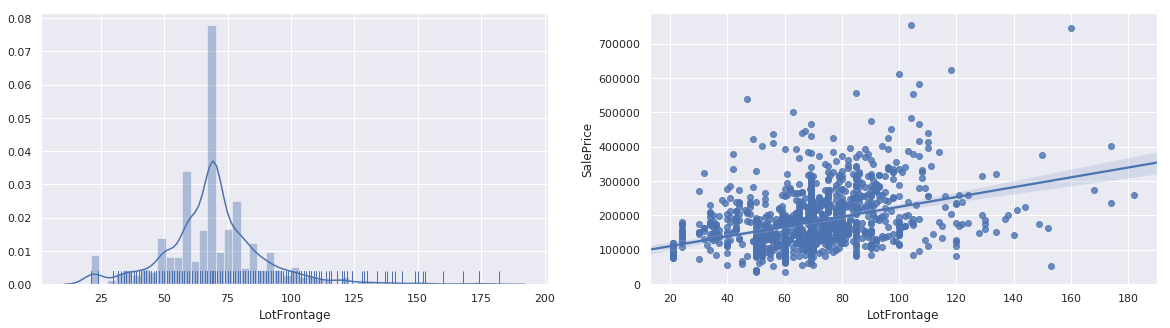

In [19]:
fig, ax = plt.subplots(figsize=(20,5) ,nrows = 1, ncols=2)
sns.regplot(x=train['LotFrontage'], y=train['SalePrice'], ax= ax[1])
sns.distplot(train['LotFrontage'], rug=True, ax=ax[0])

KeyError: 'MasVnrType'

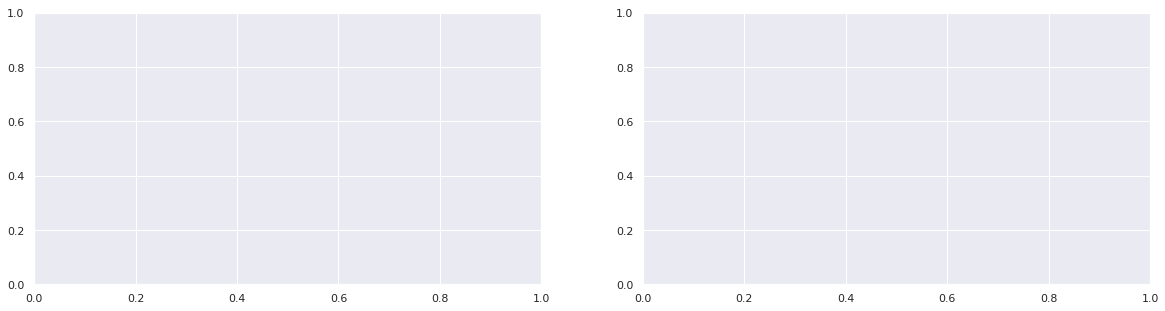

In [29]:
fig, ax = plt.subplots(figsize=(20,5) ,nrows = 1, ncols=2)
sns.regplot(x=train['MasVnrType'], y=train['SalePrice'], ax= ax[1])
sns.distplot(train['MasVnrType'], rug=True, ax=ax[0])